# RQ 2 Findings

## Introduction

Research Question 2 states:

***RQ2: When the prompt is adjusted to include assignment instructions (in-context learning) what is the impact on student learning performance?***

This question investigated the impact of in-context learning on midterm exam scores E1. The assignment instructions were added to LLM’s context of participants in the treatment group. This meant the LLM was aware of assignment-related questions.

### Alternate Hypothesis for H2

The mean student learning performance score (E1) for the treatment group, which used the context-aware AI, will be statistically significantly higher than the mean score for the control group.
### Null Hypothesis for H2

There is no statistically significant difference in the mean student learning performance scores (E1) between the treatment group and the control group.

## Methodology
A between-subjects experimental design  (Creswell & Creswell, 2017: ch8) was employed with participants assigned at random to either a control group (T1) or treatment group (T2), which employed using context-aware AI. The dependent variable was midterm exam score (E1), measured on a continuous scale. The independent variable—group assignment—was dummy coded (0 = control, 1 = treatment) for regression analysis.

Linear regression was selected as the primary analytical approach, with the beta coefficient representing the mean difference in exam scores between control and treatment. Statistical significance was assessed using p-values <= .05. 
Mediation and moderation analyses  (Edwards & Lambert, 2007) were also conducted to understand the underlying mechanisms that session counts of task completion and learning might have on the treatment. 

### Mediation Analysis
Mediation analysis was used to explore whether the treatment effect operated through changes in student usage behaviors:

- Model 1 (Treatment → Learning Session Count) Does control/treatment group assignment predict learning session count?
- Model 2 (Treatment → Task Completion Session Count) Does control/treatment group assignment predict task completion session count?

### Moderation Analysis

Moderation analysis  examined whether the treatment condition altered the strength of relationships between usage patterns and exam performance.
- Model 3 (Treatment x Learning Session Count) This model tested whether context-aware AI moderated the relationship between learning session engagement and exam performance.
- Model 4 (Treatment x Task Completion Session Count)  This model tested whether context-aware AI moderated the relationship between task completion session engagement and exam performance.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS

import seaborn as sns
from scipy import stats
import json
import import_ipynb
from IPython.display import display
# from analysis_with_ai import invoke_openrouter_ai, INTERACTION_PROMPT_TEMPLATEv2, classify_interaction
# from helper_functions import independent_ttest
from helper_functions import linear_regression_analysis, linear_regression_assumption_checks

In [3]:
# Read in the final data set
dataset = pd.read_csv("../datasets/dps-thesis-dataset.csv")
dataset.columns

Index(['participant_number', 'survey_done', 'chatbot_done', 'chatbot_group',
       'first_year', 'gender', 'year_in_school_simplified',
       'first_prog_course', 'C1', 'C2', 'E1', 'Difference_C2_C1',
       'inconclusive_session_count', 'learning_session_count',
       'task_completion_session_count', 'total_session_count',
       'total_interaction_count', 'interaction_to_session_ratio',
       'control_treatment_asnumber', 'first_prog_course_asnumber',
       'gender_asnumber', 'year_in_school_simplified_asnumber'],
      dtype='object')

## Regression Assumption Checks

Before conducting the hierarchical multiple regression analysis, several key assumptions were checked to ensure the validity of the results.

**Interpretation of Output**

Based on the regression assumption check output below the following observations were made:

- Assumptions met.
- Since the control variable is a dummay variable linearity is inherent.



--- Preparing Data for Linear Regression ---

Fitting model with standard OLS...
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.485
Date:                Mon, 06 Oct 2025   Prob (F-statistic):              0.119
Time:                        21:57:09   Log-Likelihood:                -278.92
No. Observations:                  87   AIC:                             561.8
Df Residuals:                      85   BIC:                             566.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

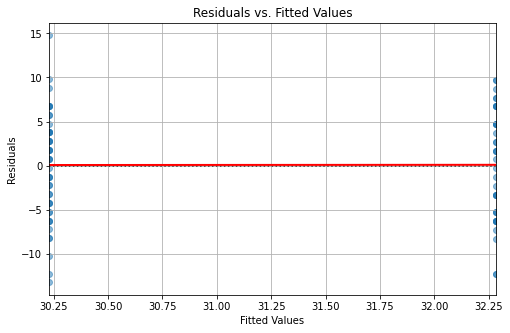

Interpretation of Residuals vs. Fitted Plot:
1. Linearity: The red line should be close to horizontal at 0. A curve indicates non-linearity.
2. Homoscedasticity: The points should be randomly scattered in a constant-width band. A funnel shape indicates heteroscedasticity.

--- ASSUMPTION 1: Linearity with Partial Regression Plots ---


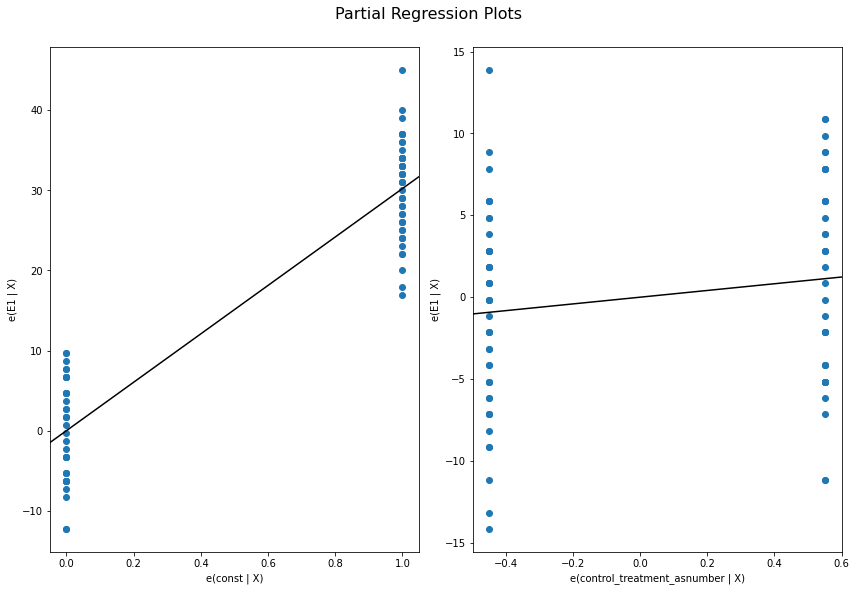

Interpretation: Each plot shows the relationship between y and one predictor,
holding other predictors constant. Look for a linear trend in each subplot.

--- ASSUMPTION 2: Homoscedasticity Test ---
✅ Breusch-Pagan Test: statistic=0.0808, p-value=0.7762
Interpretation of Breusch-Pagan Test:
 - p > 0.05 suggests homoscedasticity (constant variance)

--- ASSUMPTION 3: Checking Independence of Residuals (Autocorrelation) ---
✅ Durbin-Watson statistic: 2.11
Interpretation: The statistic ranges from 0 to 4.
- A value around 2.0 suggests no autocorrelation.
- Values < 1.5 suggest positive autocorrelation.
- Values > 2.5 suggest negative autocorrelation.

--- ASSUMPTION 4: Checking Normality of Residuals ---
✅ Shapiro-Wilk Test: statistic=0.9789, p-value=0.1672

Interpretation of Shapiro-Wilk Test:
 - p > 0.05 suggests residuals are normally distributed


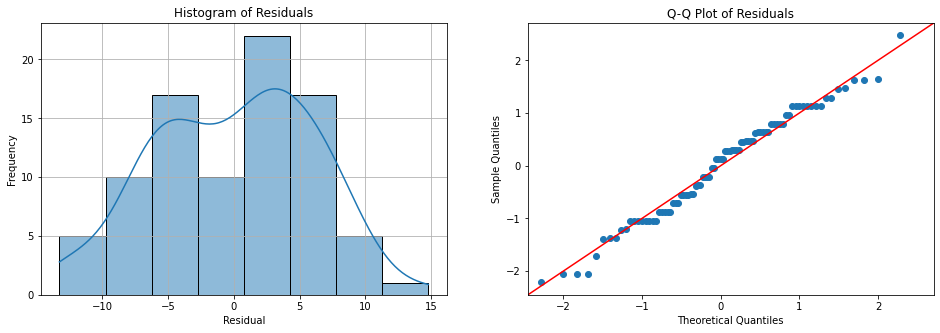

Interpretation:
1. Histogram: Should look like a bell curve.
2. Q-Q Plot: Points should fall along the 45-degree line.

--- ASSUMPTION 5: Checking for Multicollinearity ---
✅ VIF for control_treatment_asnumber: 1.0000

Interpretation of VIF:
- VIF = 1: No correlation
- 1 < VIF < 5: Moderate correlation, generally acceptable.
- VIF > 5 or 10: High correlation, indicating a multicollinearity problem.


In [4]:
ind_vars = ['control_treatment_asnumber']
dep_var = "E1"

linear_regression_assumption_checks(dataset, ind_vars, dep_var)

### Model 0: E1 ~ Treatment 

This section ran regression for the Model relationship between the treatment  midterm exam scores (E1).

**Interpretation of Output**

Based on the regression output below the following observations were made:

- p too large
- No statistically significant difference in exam scores between control and treatment groups.
- considering what we learned from RQ1, this is not surprising.
- there could be more to the story, so we will explore mediation and moderation next.

In [8]:
# group by control treatment_asnumber and calculate mean and std for E1
grouped = dataset.groupby('control_treatment_asnumber')['E1'].agg(['mean', 'std', 'count']).reset_index()
grouped

,control_treatment_asnumber,mean,std,count
0,0,30.229167,5.936686,48
1,1,32.282051,6.168463,39



Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['control_treatment_asnumber']
DEPENDENT VAR  : E1
REGRESSORS     : 1
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.485
Date:                Mon, 06 Oct 2025   Prob (F-statistic):              0.119
Time:                        22:23:12   Log-Likelihood:                -278.92
No. Observations:                  87   AIC:                             561.8
Df Residuals:                      85   BIC:                             566.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
      

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable E1'>

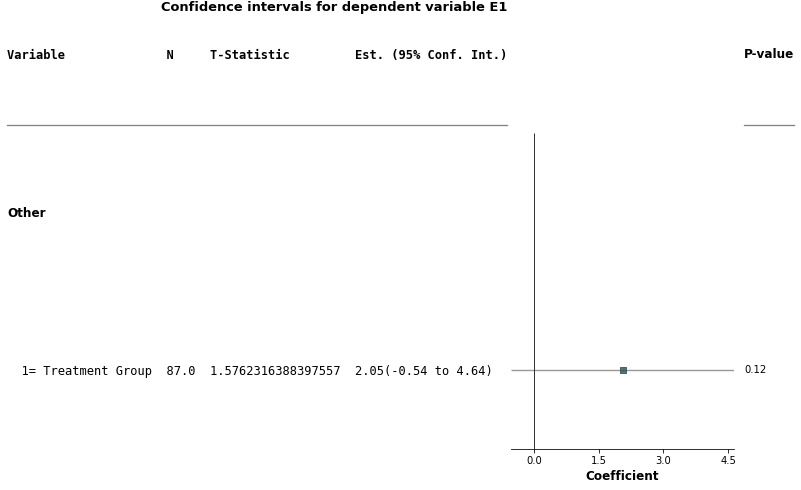

In [6]:
ind_vars = ['control_treatment_asnumber']
dep_var = "E1"

linear_regression_analysis(dataset, ind_vars, dep_var)

## Model 1: Multiple Regression with usage as Covariates for RQ2

This section ran multiple regression for the Model with learning session count and task completion count added to the model as covariates to control for covariates for midterm exam scores (E1).

E1 + Treatment + Learning Session Count + Task Completion Count


**Interpretation of Output**

Based on the regression output below the following observations were made:

- statistically significant predictors. every p < .05 overall model p < .0001
- treatment effect now emerges as significant, when controlling for usage patterns.
- more of the variance in exam scores is explained by the model (r-squared = .238)
- supression effect again.
- further investigation is needed to understand the underlying factors contributing to this variability.


Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['control_treatment_asnumber', 'learning_session_count', 'task_completion_session_count']
DEPENDENT VAR  : E1
REGRESSORS     : 3
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     8.641
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           4.68e-05
Time:                        01:26:48   Log-Likelihood:                -268.35
No. Observations:                  87   AIC:                             544.7
Df Residuals:                      83   BIC:                             554.6
Df Model:                           3                                         
Covariance Type:          

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable E1'>

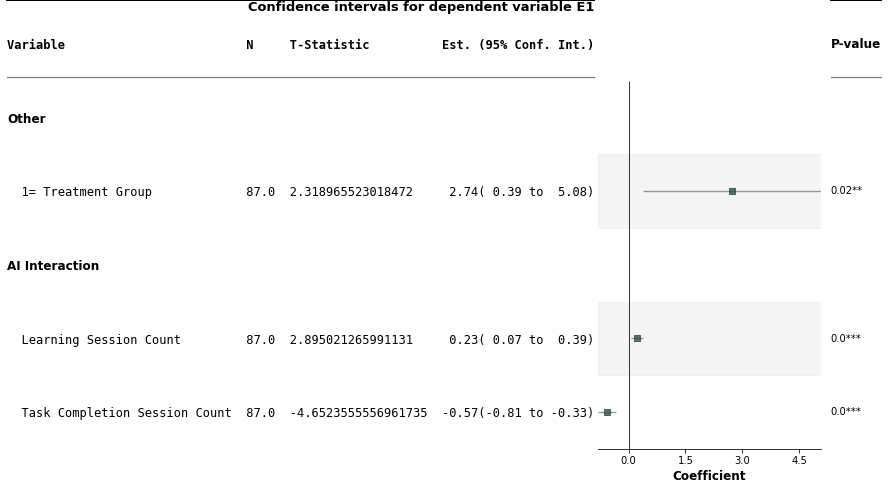

In [13]:
ind_vars = ['control_treatment_asnumber', 'learning_session_count', 'task_completion_session_count']
dep_var = "E1"

linear_regression_analysis(dataset, ind_vars, dep_var)


Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['control_treatment_asnumber', 'learning_session_count', 'task_completion_session_count']
DEPENDENT VAR  : E1
REGRESSORS     : 3
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     8.641
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           4.68e-05
Time:                        00:39:39   Log-Likelihood:                -268.35
No. Observations:                  87   AIC:                             544.7
Df Residuals:                      83   BIC:                             554.6
Df Model:                           3                                         
Covariance Type:          

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable E1'>

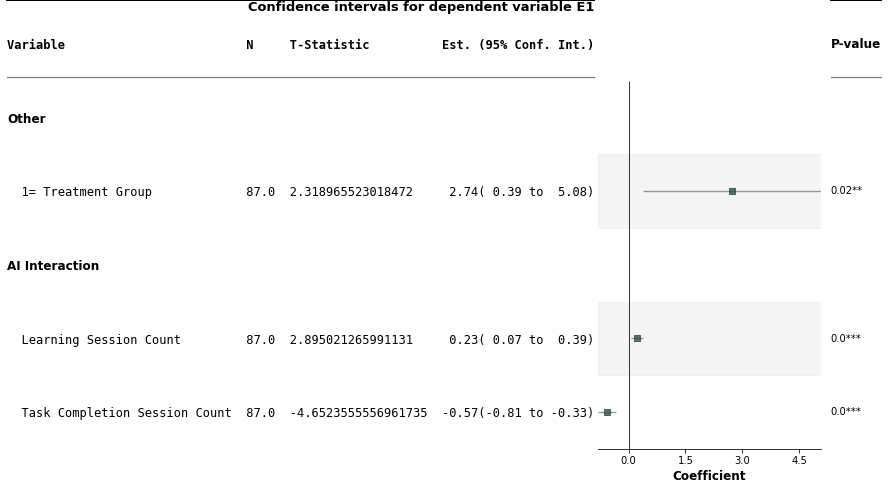

In [10]:
ind_vars = ['control_treatment_asnumber', 'learning_session_count', 'task_completion_session_count']
dep_var = "E1"

linear_regression_analysis(dataset, ind_vars, dep_var)


--- Preparing Data for Linear Regression ---

Fitting model with standard OLS...
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     8.641
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           4.68e-05
Time:                        00:38:11   Log-Likelihood:                -268.35
No. Observations:                  87   AIC:                             544.7
Df Residuals:                      83   BIC:                             554.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

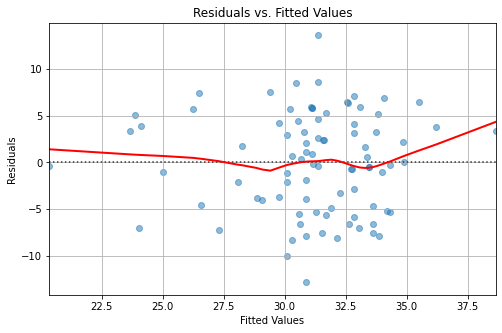

Interpretation of Residuals vs. Fitted Plot:
1. Linearity: The red line should be close to horizontal at 0. A curve indicates non-linearity.
2. Homoscedasticity: The points should be randomly scattered in a constant-width band. A funnel shape indicates heteroscedasticity.

--- ASSUMPTION 1: Linearity with Partial Regression Plots ---


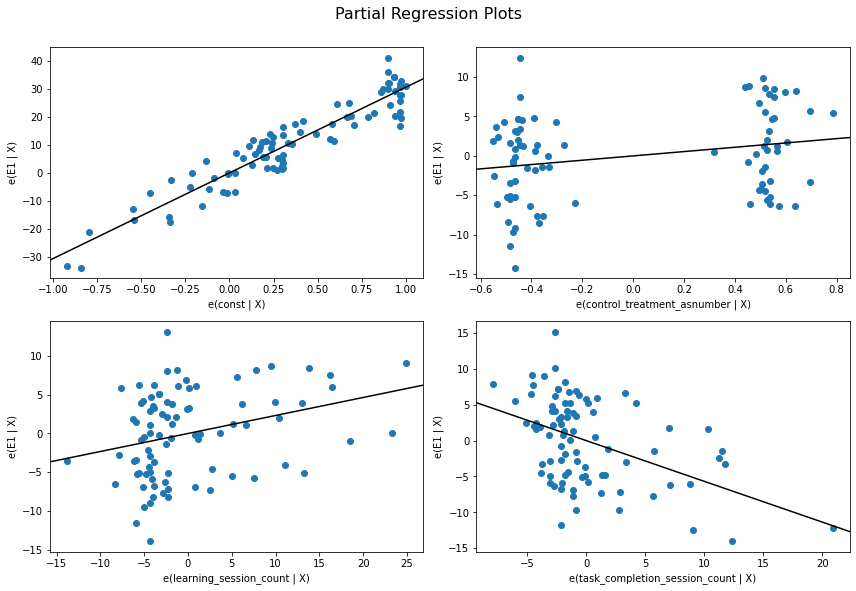

Interpretation: Each plot shows the relationship between y and one predictor,
holding other predictors constant. Look for a linear trend in each subplot.

--- ASSUMPTION 2: Homoscedasticity Test ---
✅ Breusch-Pagan Test: statistic=0.4300, p-value=0.9340
Interpretation of Breusch-Pagan Test:
 - p > 0.05 suggests homoscedasticity (constant variance)

--- ASSUMPTION 3: Checking Independence of Residuals (Autocorrelation) ---
✅ Durbin-Watson statistic: 2.19
Interpretation: The statistic ranges from 0 to 4.
- A value around 2.0 suggests no autocorrelation.
- Values < 1.5 suggest positive autocorrelation.
- Values > 2.5 suggest negative autocorrelation.

--- ASSUMPTION 4: Checking Normality of Residuals ---
✅ Shapiro-Wilk Test: statistic=0.9774, p-value=0.1318

Interpretation of Shapiro-Wilk Test:
 - p > 0.05 suggests residuals are normally distributed


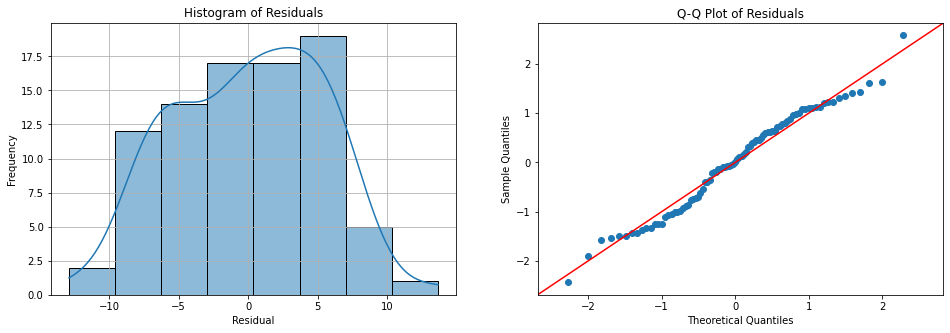

Interpretation:
1. Histogram: Should look like a bell curve.
2. Q-Q Plot: Points should fall along the 45-degree line.

--- ASSUMPTION 5: Checking for Multicollinearity ---
✅ VIF for control_treatment_asnumber: 1.0225
✅ VIF for learning_session_count: 1.2157
✅ VIF for task_completion_session_count: 1.2031

Interpretation of VIF:
- VIF = 1: No correlation
- 1 < VIF < 5: Moderate correlation, generally acceptable.
- VIF > 5 or 10: High correlation, indicating a multicollinearity problem.


In [ ]:
# Quick post-hoc check for linear assumptions 
linear_regression_assumption_checks(dataset, ind_vars, dep_var)

## Mediation Analysis for RQ2 (Model 2a)

This section ran a mediation analysis for the each of the AI. We know Learning session count + Task Completion count impact Exam performance. 

Now we examine whether the treatment influenced learning session counts and task completion session counts, which in turn affected exam performance.

Big picture: Treatment → (Learning Session Count + Task Completion Session Count) → Exam Performance (E1)

Model 2a: Learning Session Count ~ Treatment


**Interpretation of Output**

Based on the regression output below the following observations were made:

- treatment does not significantly predict learning session count.
- no mediation effect through learning session count.


In [16]:
# descriptive statistics for learning_session_count by control_treatment_asnumber
dataset.groupby('control_treatment_asnumber')['learning_session_count'].describe()


,count,mean,std,min,25%,50%,75%,max
control_treatment_asnumber,,,,,,,,
0,48.0,7.791667,8.176142,0.0,1.0,3.5,11.25,33.0
1,39.0,6.000000,7.847225,0.0,1.0,4.0,7.00,30.0



Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['control_treatment_asnumber']
DEPENDENT VAR  : learning_session_count
REGRESSORS     : 1
                              OLS Regression Results                              
Dep. Variable:     learning_session_count   R-squared:                       0.012
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     1.071
Date:                    Tue, 07 Oct 2025   Prob (F-statistic):              0.304
Time:                            01:47:37   Log-Likelihood:                -303.68
No. Observations:                      87   AIC:                             611.4
Df Residuals:                          85   BIC:                             616.3
Df Model:                               1                                         
Covariance Type:             

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable learning_session_count'>

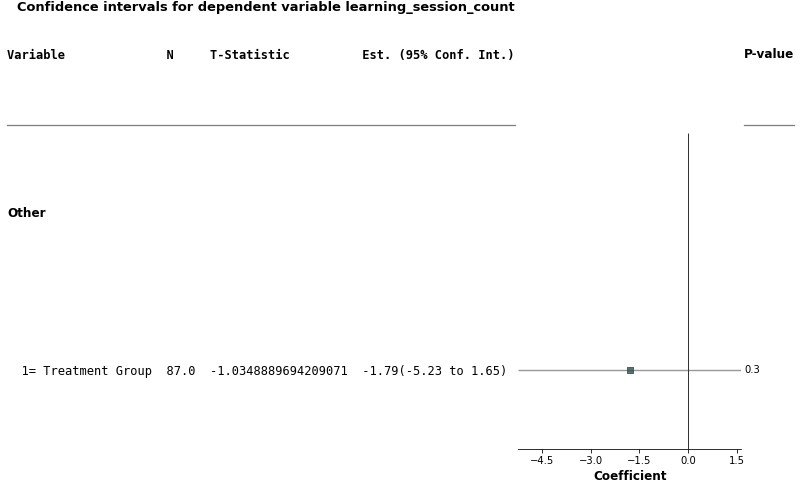

In [14]:
ind_vars = ['control_treatment_asnumber']
dep_var = "learning_session_count"

linear_regression_analysis(dataset, ind_vars, dep_var)

## Mediation Analysis for RQ2 (Model 2b)

This section ran a mediation analysis for the each of the AI. We know Learning session count + Task Completion count impact Exam performance. 

Now we examine whether the treatment influenced learning session counts and task completion session counts, which in turn affected exam performance.

Big picture: Treatment → (Learning Session Count + Task Completion Session Count) → Exam Performance (E1)


Model 2b: Task Completion Session Count ~ Treatment


**Interpretation of Output**

Based on the regression output below the following observations were made:

- treatment does not significantly predict task completion session count.
- no mediation effect through task completion session count.



In [17]:
# descriptive statistics for task_completion_session_count by control_treatment_asnumber
dataset.groupby('control_treatment_asnumber')['task_completion_session_count'].describe()


,count,mean,std,min,25%,50%,75%,max
control_treatment_asnumber,,,,,,,,
0,48.0,3.937500,5.244678,0.0,0.0,1.5,5.0,19.0
1,39.0,4.410256,5.300039,0.0,1.0,3.0,7.0,25.0



Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['control_treatment_asnumber']
DEPENDENT VAR  : task_completion_session_count
REGRESSORS     : 1
                                  OLS Regression Results                                 
Dep. Variable:     task_completion_session_count   R-squared:                       0.002
Model:                                       OLS   Adj. R-squared:                 -0.010
Method:                            Least Squares   F-statistic:                    0.1732
Date:                           Tue, 07 Oct 2025   Prob (F-statistic):              0.678
Time:                                   01:56:38   Log-Likelihood:                -267.02
No. Observations:                             87   AIC:                             538.0
Df Residuals:                                 85   BIC:                             543.0
Df Model:                                      1 

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable task_completion_session_count'>

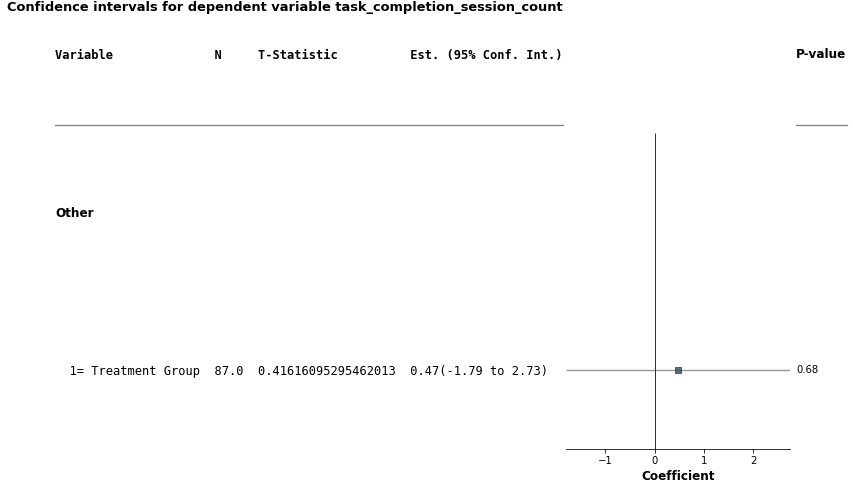

In [18]:
ind_vars = ['control_treatment_asnumber']
dep_var = "task_completion_session_count"

linear_regression_analysis(dataset, ind_vars, dep_var)

## Moderation Analysis for RQ2 (Model 3a)

This section ran a moderation analysis for the each of the AI use independent variables to see if the treatment altered the strength of the relationships. 


Model 3a: E1 ~ Treatment + Learning Session Count + Treatment x Learning Session Count

**Interpretation of Output**

Based on the regression output below the following observations were made:

- not statistically significant interaction effect.
- not statistically significant overall effect.
- No evidence of moderation through learning session count.


In [21]:
# Add the moderators 
dataset['learning_session_interaction'] = dataset['learning_session_count'] * dataset['control_treatment_asnumber']
dataset['task_completion_interaction'] = dataset['task_completion_session_count'] * dataset['control_treatment_asnumber']

ind_vars = [ 'control_treatment_asnumber', 'learning_session_count', 'learning_session_interaction']
dep_var = "E1"
linear_regression_analysis(dataset, ind_vars, dep_var, do_plot=False)



Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['control_treatment_asnumber', 'learning_session_count', 'learning_session_interaction']
DEPENDENT VAR  : E1
REGRESSORS     : 3
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.289
Date:                Tue, 07 Oct 2025   Prob (F-statistic):              0.284
Time:                        02:13:50   Log-Likelihood:                -278.19
No. Observations:                  87   AIC:                             564.4
Df Residuals:                      83   BIC:                             574.2
Df Model:                           3                                         
Covariance Type:           

## Moderation Analysis for RQ2 (Model 3b)

This section ran a moderation analysis for the each of the AI use independent variables to see if the treatment altered the strength of the relationships. 


Model 3b: E1 ~ Treatment + Task Completion Session Count + Treatment x Task Completion Session Count

**Interpretation of Output**

Based on the regression output below the following observations were made:

- not statistically significant interaction effect.
- but there was astatistically significant overall effect.
- No evidence of moderation through task completion session count.

In [22]:
ind_vars = [ 'control_treatment_asnumber', 'task_completion_session_count', 'task_completion_interaction']
dep_var = "E1"
linear_regression_analysis(dataset, ind_vars, dep_var, do_plot=False)


Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['control_treatment_asnumber', 'task_completion_session_count', 'task_completion_interaction']
DEPENDENT VAR  : E1
REGRESSORS     : 3
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5.350
Date:                Tue, 07 Oct 2025   Prob (F-statistic):            0.00203
Time:                        11:41:17   Log-Likelihood:                -272.48
No. Observations:                  87   AIC:                             553.0
Df Residuals:                      83   BIC:                             562.8
Df Model:                           3                                         
Covariance Type:     